## YOLO Model Training Notebook

This is a notebook for the BYU Locating Bacterial Flagellar Motors 2025 Kaggle challenge, inspired by @andrewjdarley . This notebook handles the training of YOLOv11 object detection models on our prepared dataset.

## About this Notebook

This training notebook implements a full YOLOv11 training pipeline for detecting bacterial flagellar motors in tomographic slices. The notebook:

1. **Dataset Configuration**: Sets up and validates the YOLO-format dataset YAML configuration
2. **Model Initialization**: Loads pre-trained YOLOv11m weights for transfer learning
3. **Training Process**: Fine tunes the model with early stopping and periodic checkpoints
4. **Loss Visualization**: Plots training and validation dfl loss curves to monitor progress
5. **Performance Evaluation**: Tests the trained model on random validation samples
6. **Model Export**: Saves the trained weights for use in the submission notebook

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 18.6 MB/s eta 0:00:00


In [2]:
import os
import torch
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from ultralytics import YOLO
import yaml
import pandas as pd
import json
import torch.nn as nn
from ultralytics import YOLO
from ultralytics.nn.modules import Conv, C2f
from typing import List, Optional, Dict, Any, Union


# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)
torch.manual_seed(42)

# Define paths for Kaggle environment
yolo_dataset_dir = "/kaggle/input/parse-data/yolo_dataset"
yolo_weights_dir = "/kaggle/working/yolo_weights"
yolo_pretrained_weights = "yolo11m.pt"  # Path to pre-downloaded weights

# Create weights directory if it doesn't exist
os.makedirs(yolo_weights_dir, exist_ok=True)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


Starting YOLO training process...
Directory status:
- Train images dir exists: True
- Val images dir exists: True
- Train labels dir exists: True
- Val labels dir exists: True
Found original dataset.yaml at /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Fixing YAML paths in /kaggle/input/parse-data/yolo_dataset/dataset.yaml
Created fixed YAML at /kaggle/working/fixed_dataset.yaml with path: /kaggle/input/parse-data/yolo_dataset
Using YAML file: /kaggle/working/fixed_dataset.yaml
YAML file contents:
names:
  0: motor
path: /kaggle/input/parse-data/yolo_dataset
train: images/train
val: images/val


Starting YOLO training...
Loading pre-trained weights from: yolo11m.pt


100%|██████████| 38.8M/38.8M [00:00<00:00, 161MB/s]


Using standard YOLOv8 architecture
Ultralytics 8.3.119 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11m.pt, data=/kaggle/working/fixed_dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=2, cache=False, device=0, workers=8, project=runs/detect, name=motor_detector, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=True, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 17.9MB/s]

Overriding class names with single class.


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 75.8MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 45.7±4.2 MB/s, size: 345.6 KB)


train: Scanning /kaggle/input/parse-data/yolo_dataset/labels/train... 3262 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3262/3262 [00:13<00:00, 243.36it/s]


WARNING ⚠️ train: Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 45.7±19.5 MB/s, size: 365.7 KB)


val: Scanning /kaggle/input/parse-data/yolo_dataset/labels/val... 792 images, 0 backgrounds, 0 corrupt: 100%|██████████| 792/792 [00:03<00:00, 213.45it/s]


WARNING ⚠️ val: Cache directory /kaggle/input/parse-data/yolo_dataset/labels is not writeable, cache not saved.
Plotting labels to runs/detect/motor_detector/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.0005), 112 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/motor_detector
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.92G      3.364      5.082      1.518         20        640: 100%|██████████| 204/204 [02:03<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:13<00:00,  1.80it/s]


                   all        792        792      0.194      0.193     0.0732     0.0162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.04G      2.935      3.282      1.306         15        640: 100%|██████████| 204/204 [02:06<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all        792        792      0.347      0.371      0.248     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      8.04G      2.838      2.712      1.291         18        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.415      0.428      0.309      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      8.08G      2.755      2.508      1.246         26        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all        792        792      0.513      0.577      0.441      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      8.08G      2.631      2.345      1.224         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.595      0.561      0.538       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      8.09G      2.615      2.256      1.214         24        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.521      0.448      0.412      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      8.09G      2.609      2.196        1.2         35        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.567      0.593      0.534      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      8.09G      2.548      2.142      1.183         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.654      0.583      0.583      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.08G      2.533      2.081      1.176         21        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.598      0.614      0.571      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      8.08G      2.479      2.038       1.16         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.709      0.665      0.657      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      8.07G      2.455      1.997      1.164         26        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792        0.7      0.655       0.69      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      8.09G      2.433      1.949      1.155         16        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.719      0.622      0.677      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      8.09G      2.428      1.984      1.156         18        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.728      0.715      0.703      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      8.09G      2.408      1.894       1.15         29        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.733       0.73      0.757      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      8.08G      2.358      1.833      1.127         26        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792       0.82      0.736       0.77      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      8.08G      2.374      1.821      1.131         19        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.811      0.705      0.759       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      8.07G      2.328      1.744      1.121         28        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.768      0.725      0.741      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      8.09G      2.325      1.783      1.119         21        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.807      0.717       0.78      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      8.09G      2.313      1.737      1.121         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792       0.81      0.763      0.787      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      8.08G        2.3      1.727      1.117         23        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.761      0.695      0.724      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      8.08G      2.308      1.747      1.108         27        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all        792        792      0.868       0.79      0.846      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      8.07G      2.273      1.708      1.104         27        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792       0.84      0.763      0.807      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      8.08G      2.262      1.688      1.086         31        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.832      0.804      0.842      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      8.08G      2.237      1.662      1.085         23        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.859      0.777      0.836      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      8.08G      2.219      1.618      1.087         24        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.851      0.823      0.847       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      8.08G      2.224      1.603      1.088         29        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.862       0.77      0.822       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      8.08G      2.205      1.589      1.073         30        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all        792        792      0.856      0.783      0.844      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.09G      2.168      1.572      1.063         17        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.818      0.828      0.836      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      8.09G      2.172      1.568      1.061         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.856      0.818      0.867      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      8.09G      2.168      1.559      1.066         23        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all        792        792      0.809      0.711      0.798      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      8.08G      2.136      1.516      1.051         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.833       0.81      0.871      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      8.08G      2.113      1.519      1.044         27        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.842      0.827      0.861       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      8.08G      2.124      1.515      1.055         23        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]

                   all        792        792      0.784      0.798      0.815      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      8.08G      2.099      1.467      1.048         18        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.829      0.826      0.865      0.418



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      8.08G      2.111      1.515      1.046         24        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.847      0.841       0.89      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      8.08G      2.093      1.487      1.046         26        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.769      0.763      0.809      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      8.09G       2.07      1.457      1.036         31        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.844      0.847      0.884      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.08G      2.083      1.467      1.041         19        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.808      0.802      0.847      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      8.08G      2.065      1.453      1.036         26        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.754      0.824      0.838      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      8.09G      2.046      1.444      1.033         27        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.807      0.787      0.808      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.08G      2.058      1.437       1.03         23        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.817      0.824      0.866      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      8.08G      2.094      1.439      1.035         24        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.841      0.841      0.884      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.07G      2.032      1.408      1.026         19        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.847      0.856      0.891      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      8.08G      2.005       1.41      1.021         26        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.832       0.85      0.878       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      8.09G      2.052      1.415      1.024         25        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.848      0.845      0.883      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.08G       2.02      1.379      1.027         19        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.806      0.832      0.854      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      8.09G      1.989      1.374      1.023         31        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.822      0.792      0.848      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.08G      1.995      1.358      1.017         26        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.845      0.855      0.897       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      8.08G      1.998      1.354       1.02         13        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all        792        792      0.835      0.849      0.885      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.09G      1.989      1.365      1.017         23        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.817      0.823      0.852      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.07G      1.994      1.393      1.021         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.843      0.869      0.903      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      8.08G      1.953      1.312      1.017         26        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.829      0.857      0.886      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      8.08G      1.981      1.342      1.011         26        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.777      0.825      0.858      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.08G      2.012      1.339      1.021         26        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.831      0.867      0.886       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      8.08G      1.939      1.296      1.011         22        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.847      0.856      0.884      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      8.08G      1.965      1.293      1.007         33        640: 100%|██████████| 204/204 [02:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.837      0.855      0.871      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      8.08G      1.949       1.32       1.01         19        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.832      0.848      0.872      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      8.09G      1.936      1.306      1.002         26        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.811      0.847      0.871      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      8.09G      1.942       1.29      1.002         21        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.856      0.862      0.901      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      8.08G      1.916      1.279      1.002         27        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.869      0.875      0.905      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      8.09G      1.932      1.284     0.9951         25        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.825      0.835      0.883      0.459



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      8.07G      1.897      1.247     0.9988         35        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792       0.85      0.886      0.918      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      8.08G      1.888      1.265      1.001         19        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.802      0.818      0.872      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      8.08G      1.911      1.271     0.9982         28        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.787      0.821       0.86       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      8.07G      1.907      1.259     0.9957         29        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.796      0.809      0.875       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      8.08G      1.893      1.257      0.995         24        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all        792        792      0.793      0.835       0.88      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      8.09G      1.892      1.233     0.9947         27        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.99it/s]

                   all        792        792      0.806      0.867      0.892      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.08G      1.912      1.278      0.996         27        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all        792        792      0.822       0.82      0.871      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      8.07G      1.872       1.23     0.9869         25        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.867      0.876      0.917       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      8.08G      1.856       1.21     0.9867         17        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.01it/s]

                   all        792        792       0.85      0.869      0.913      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      8.09G      1.845      1.202     0.9862         21        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.849       0.89      0.894       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      8.09G      1.852      1.226     0.9802         16        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.862      0.885      0.912      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.09G      1.852      1.216     0.9883         21        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.817      0.816      0.888      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      8.08G      1.857      1.214     0.9832         24        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.836      0.828      0.883      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      8.08G      1.852      1.208     0.9876         20        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.851      0.859      0.901      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      8.07G      1.857      1.208     0.9856         25        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all        792        792      0.787      0.858      0.889       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      8.08G      1.851      1.203     0.9831         20        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.855      0.875      0.915      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      8.09G      1.826      1.189     0.9784         19        640: 100%|██████████| 204/204 [02:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.855       0.89      0.924      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.08G      1.825       1.18     0.9741         24        640: 100%|██████████| 204/204 [02:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.848      0.888      0.913      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      8.09G      1.829      1.181     0.9782         28        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.864       0.91      0.923      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      8.07G      1.803      1.155     0.9726         22        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792       0.84      0.866      0.899      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      8.07G      1.823      1.178     0.9763         20        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all        792        792      0.848      0.876      0.918      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      8.08G      1.803      1.157     0.9692         24        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.844      0.886      0.916      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.09G      1.794      1.164     0.9731         21        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.863        0.9      0.924      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      8.08G      1.809      1.161     0.9722         22        640: 100%|██████████| 204/204 [02:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.836       0.87      0.915        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      8.07G      1.799      1.158     0.9697         20        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.855      0.887      0.917      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      8.08G      1.805      1.133      0.975         20        640: 100%|██████████| 204/204 [02:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792       0.86      0.869      0.923        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      8.09G      1.779      1.141     0.9737         17        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.854      0.882       0.92      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      8.08G      1.797      1.147     0.9735         20        640: 100%|██████████| 204/204 [02:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.861      0.886      0.921      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      8.07G      1.774      1.132     0.9713         29        640: 100%|██████████| 204/204 [02:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.834      0.875      0.914      0.499


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.08G       1.54     0.8625     0.9419         13        640: 100%|██████████| 204/204 [02:05<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.05it/s]

                   all        792        792      0.838      0.879      0.921      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      8.09G        1.5     0.8315     0.9372         14        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.845      0.882      0.917       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      8.08G      1.498      0.829     0.9369         14        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.858      0.875      0.914      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      8.09G       1.49     0.8224     0.9353         12        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.849      0.893      0.913        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      8.08G      1.489     0.8046     0.9348         12        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.841      0.883      0.909      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      8.08G      1.495     0.8291     0.9326         13        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.06it/s]

                   all        792        792      0.848      0.895      0.921      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      8.09G       1.48     0.8056     0.9369         12        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.04it/s]

                   all        792        792      0.863      0.883      0.915      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.08G      1.465     0.8034     0.9261         14        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.03it/s]

                   all        792        792      0.863      0.903       0.92      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.08G      1.466     0.7983     0.9301         13        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792       0.86        0.9      0.917      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      8.08G       1.45     0.7899     0.9249         14        640: 100%|██████████| 204/204 [02:04<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  2.02it/s]

                   all        792        792      0.855      0.898       0.92      0.492



100 epochs completed in 3.847 hours.
Optimizer stripped from runs/detect/motor_detector/weights/last.pt, 40.5MB
Optimizer stripped from runs/detect/motor_detector/weights/best.pt, 40.5MB

Validating runs/detect/motor_detector/weights/best.pt...
Ultralytics 8.3.119 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 25/25 [00:12<00:00,  1.94it/s]


                   all        792        792      0.861      0.886      0.921      0.525


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.2ms preprocess, 11.9ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to runs/detect/motor_detector
Loss curve saved to runs/detect/motor_detector/dfl_loss_curve.png

Best model found at epoch 90 with validation DFL loss: 0.8506

Training complete!

Running predictions on sample images...

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_ba9b3d_z0138_y0856_x0343.jpg: 640x640 1 item, 24.2ms
Speed: 2.8ms preprocess, 24.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_285d15_z0135_y0391_x0611.jpg: 640x640 1 item, 24.2ms
Speed: 2.5ms preprocess, 24.2ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yolo_dataset/images/val/tomo_ff505c_z0112_y0816_x0678.jpg: 640x640 1 item, 24.2ms
Speed: 2.5ms preprocess, 24.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /kaggle/input/parse-data/yo

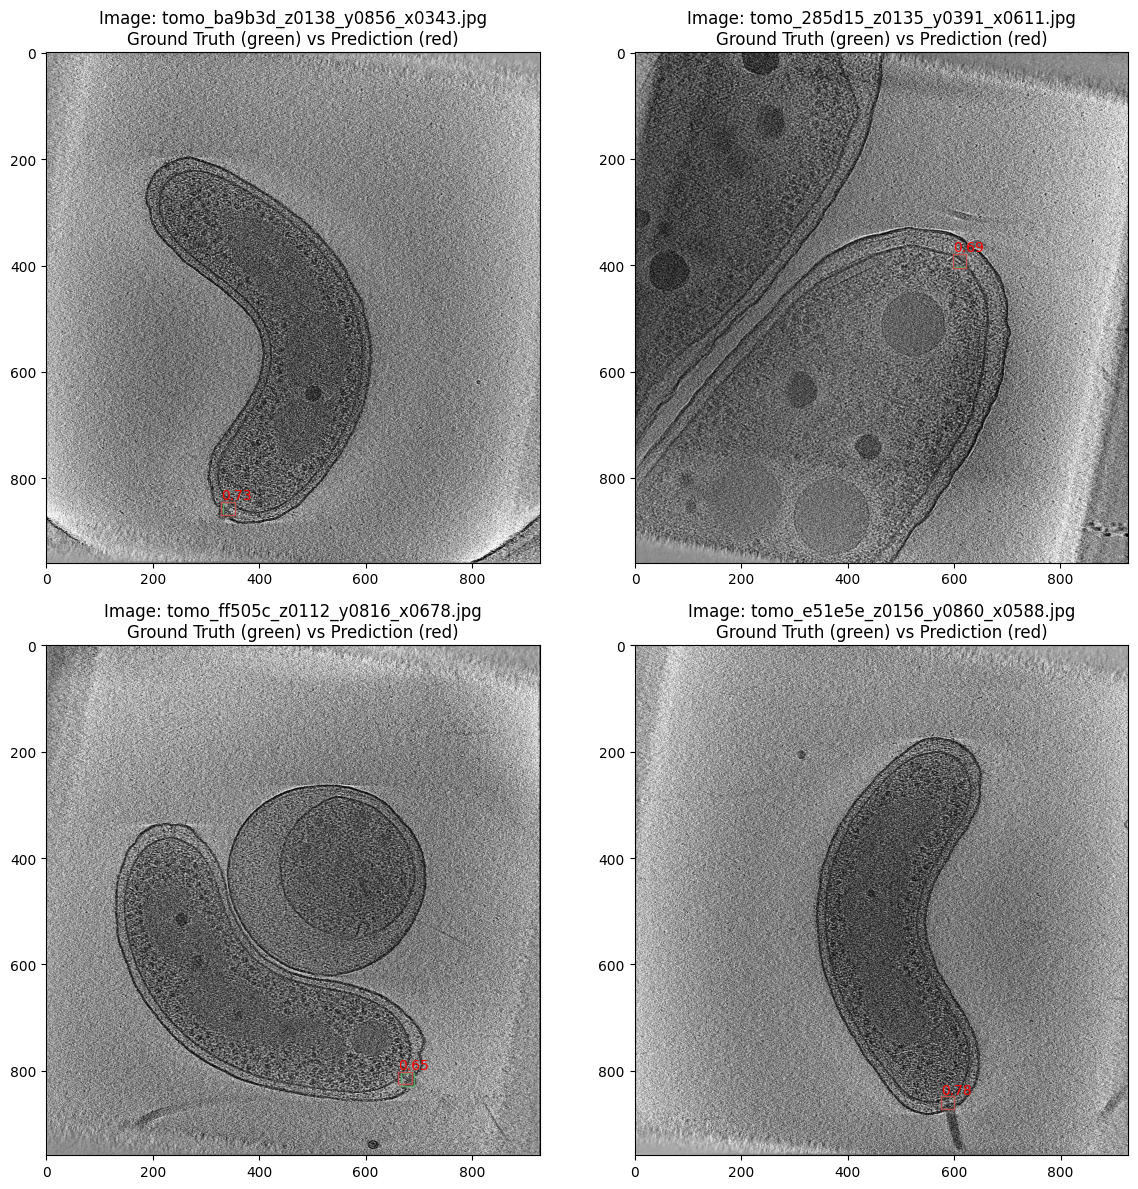

In [4]:
def fix_yaml_paths(yaml_path):
    """
    Fix the paths in the YAML file to match the actual Kaggle directories
    
    Args:
        yaml_path (str): Path to the original dataset YAML file
        
    Returns:
        str: Path to the fixed YAML file
    """
    print(f"Fixing YAML paths in {yaml_path}")
    
    # Read the original YAML
    with open(yaml_path, 'r') as f:
        yaml_data = yaml.safe_load(f)
    
    # Update paths to use actual dataset location
    if 'path' in yaml_data:
        yaml_data['path'] = yolo_dataset_dir
    
    # Create a new fixed YAML in the working directory
    fixed_yaml_path = "/kaggle/working/fixed_dataset.yaml"
    with open(fixed_yaml_path, 'w') as f:
        yaml.dump(yaml_data, f)
    
    print(f"Created fixed YAML at {fixed_yaml_path} with path: {yaml_data.get('path')}")
    return fixed_yaml_path

def plot_dfl_loss_curve(run_dir):
    """
    Plot the DFL loss curves for train and validation, marking the best model
    
    Args:
        run_dir (str): Directory where the training results are stored
    """
    # Path to the results CSV file
    results_csv = os.path.join(run_dir, 'results.csv')
    
    if not os.path.exists(results_csv):
        print(f"Results file not found at {results_csv}")
        return
    
    # Read results CSV
    results_df = pd.read_csv(results_csv)
    
    # Check if DFL loss columns exist
    train_dfl_col = [col for col in results_df.columns if 'train/dfl_loss' in col]
    val_dfl_col = [col for col in results_df.columns if 'val/dfl_loss' in col]
    
    if not train_dfl_col or not val_dfl_col:
        print("DFL loss columns not found in results CSV")
        print(f"Available columns: {results_df.columns.tolist()}")
        return
    
    train_dfl_col = train_dfl_col[0]
    val_dfl_col = val_dfl_col[0]
    
    # Find the epoch with the best validation loss
    best_epoch = results_df[val_dfl_col].idxmin()
    best_val_loss = results_df.loc[best_epoch, val_dfl_col]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Plot training and validation losses
    plt.plot(results_df['epoch'], results_df[train_dfl_col], label='Train DFL Loss')
    plt.plot(results_df['epoch'], results_df[val_dfl_col], label='Validation DFL Loss')
    
    # Mark the best model with a vertical line
    plt.axvline(x=results_df.loc[best_epoch, 'epoch'], color='r', linestyle='--', 
                label=f'Best Model (Epoch {int(results_df.loc[best_epoch, "epoch"])}, Val Loss: {best_val_loss:.4f})')
    
    # Add labels and legend
    plt.xlabel('Epoch')
    plt.ylabel('DFL Loss')
    plt.title('Training and Validation DFL Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    
    # Save the plot in the same directory as weights
    plot_path = os.path.join(run_dir, 'dfl_loss_curve.png')
    plt.savefig(plot_path)
    
    # Also save it to the working directory for easier access
    plt.savefig(os.path.join('/kaggle/working', 'dfl_loss_curve.png'))
    
    print(f"Loss curve saved to {plot_path}")
    plt.close()
    
    # Return the best epoch info
    return best_epoch, best_val_loss

def train_yolo_model(yaml_path, pretrained_weights_path, epochs=100, batch_size=16, img_size=640, 
                     yolo_weights_dir='runs/detect', devices=0):
    """
    Train a YOLO model on the prepared dataset
    
    Args:
        yaml_path (str): Path to the dataset YAML file
        pretrained_weights_path (str): Path to pre-downloaded weights file
        epochs (int): Number of training epochs
        batch_size (int): Batch size for training
        img_size (int): Image size for training
        yolo_weights_dir (str): Directory to save training results
    """
    print(f"Loading pre-trained weights from: {pretrained_weights_path}")
    
    # Load the standard YOLOv11 model
    model = YOLO(pretrained_weights_path)
        
    
    # Train the model with early stopping
    results = model.train(
        data=yaml_path,
        epochs=epochs,
        batch=batch_size,
        imgsz=img_size,
        project=yolo_weights_dir,
        device=devices,
        name='motor_detector',
        exist_ok=True,
         # patience=10,              # Removing the early stopping
        save_period=2,           # Save checkpoints every 5 epochs
        val=True,                # Ensure validation is performed
        verbose=True,             # Show detailed output during training
        single_cls=True,
        degrees=180,                # Our custom based augmentation techinique in an attempt to make the model better, rotating the image 180 degrees
        translate=0.2,                 # Randomly Shifts the Image 
        shear=2.0,                      # Shear transformation, Adds minor geometric distortion, simulating different viewing angles or slants.
        perspective=0.001,              # Adding a perspective warp
        flipud=0.5,                     # Vertically flippin the image with 50% probability
        fliplr=0.5,                     # Horizontally flipping the image with 50% probability
        mixup=0.25                      # With 25% probability, mixes two training images and their labels by blending them.
    )
    
    # Get the path to the run directory
    run_dir = os.path.join(yolo_weights_dir, 'motor_detector')
    
    # Plot and save the loss curve
    best_epoch_info = plot_dfl_loss_curve(run_dir)
    
    if best_epoch_info:
        best_epoch, best_val_loss = best_epoch_info
        print(f"\nBest model found at epoch {best_epoch} with validation DFL loss: {best_val_loss:.4f}")
    
    return model, results


def predict_on_samples(model, num_samples=4, conf_threshold=0.25):
    """
    Run predictions on random validation samples and display results
    
    Args:
        model: Trained YOLO model
        num_samples (int): Number of random samples to test
    """
    # Get validation images
    val_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    if not os.path.exists(val_dir):
        print(f"Validation directory not found at {val_dir}")
        # Try train directory instead if val doesn't exist
        val_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
        print(f"Using train directory for predictions instead: {val_dir}")
        
    if not os.path.exists(val_dir):
        print("No images directory found for predictions")
        return
    
    val_images = os.listdir(val_dir)
    
    if len(val_images) == 0:
        print("No images found for prediction")
        return
    
    # Select random samples
    num_samples = min(num_samples, len(val_images))
    samples = random.sample(val_images, num_samples)
    
    # Create figure
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    axes = axes.flatten()
    
    for i, img_file in enumerate(samples):
        if i >= len(axes):
            break
            
        img_path = os.path.join(val_dir, img_file)
        
        # Run prediction
        results = model.predict(img_path, conf=conf_threshold, batch=4)[0]
        
        # Load and display the image
        img = Image.open(img_path)
        axes[i].imshow(np.array(img), cmap='gray')
        
        # Draw ground truth box if available (from filename)
        try:
            # This assumes your filenames contain coordinates in a specific format
            parts = img_file.split('_')
            y_part = [p for p in parts if p.startswith('y')]
            x_part = [p for p in parts if p.startswith('x')]
            
            if y_part and x_part:
                y_gt = int(y_part[0][1:])
                x_gt = int(x_part[0][1:].split('.')[0])
                
                box_size = 24
                rect_gt = Rectangle((x_gt - box_size//2, y_gt - box_size//2), 
                              box_size, box_size, 
                              linewidth=1, edgecolor='g', facecolor='none')
                axes[i].add_patch(rect_gt)
        except:
            pass  # Skip ground truth if parsing fails
        
        # Draw predicted boxes (red)
        if len(results.boxes) > 0:
            boxes = results.boxes.xyxy.cpu().numpy()
            confs = results.boxes.conf.cpu().numpy()
            
            for box, conf in zip(boxes, confs):
                x1, y1, x2, y2 = box
                rect_pred = Rectangle((x1, y1), x2-x1, y2-y1, 
                                     linewidth=1, edgecolor='r', facecolor='none')
                axes[i].add_patch(rect_pred)
                axes[i].text(x1, y1-5, f'{conf:.2f}', color='red')
        
        axes[i].set_title(f"Image: {img_file}\nGround Truth (green) vs Prediction (red)")
    
    plt.tight_layout()
    
    # Save the predictions plot
    plt.savefig(os.path.join('/kaggle/working', 'predictions.png'))
    plt.show()

# Check and create a dataset YAML if needed
def prepare_dataset():
    """
    Check if dataset exists and create a proper YAML if needed
    
    Returns:
        str: Path to the YAML file to use for training
    """
    # Check if images exist
    train_images_dir = os.path.join(yolo_dataset_dir, 'images', 'train')
    val_images_dir = os.path.join(yolo_dataset_dir, 'images', 'val')
    train_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'train')
    val_labels_dir = os.path.join(yolo_dataset_dir, 'labels', 'val')
    
    # Print directory existence status
    print(f"Directory status:")
    print(f"- Train images dir exists: {os.path.exists(train_images_dir)}")
    print(f"- Val images dir exists: {os.path.exists(val_images_dir)}")
    print(f"- Train labels dir exists: {os.path.exists(train_labels_dir)}")
    print(f"- Val labels dir exists: {os.path.exists(val_labels_dir)}")
    
    # Check for original YAML file
    original_yaml_path = os.path.join(yolo_dataset_dir, 'dataset.yaml')
    
    if os.path.exists(original_yaml_path):
        print(f"Found original dataset.yaml at {original_yaml_path}")
        # Fix the paths in the YAML
        return fix_yaml_paths(original_yaml_path)
    else:
        print(f"Original dataset.yaml not found, creating a new one")
        
        # Create a new YAML file
        yaml_data = {
            'path': yolo_dataset_dir,
            'train': 'images/train',
            'val': 'images/train' if not os.path.exists(val_images_dir) else 'images/val',
            'names': {0: 'motor'}
        }
        
        new_yaml_path = "/kaggle/working/dataset.yaml"
        with open(new_yaml_path, 'w') as f:
            yaml.dump(yaml_data, f)
            
        print(f"Created new YAML at {new_yaml_path}")
        return new_yaml_path

# Main execution
def main():
    print("Starting YOLO training process...")
    
    # Prepare dataset and get YAML path
    yaml_path = prepare_dataset()
    print(f"Using YAML file: {yaml_path}")
    
    # Print YAML file contents
    with open(yaml_path, 'r') as f:
        yaml_content = f.read()
    print(f"YAML file contents:\n{yaml_content}")
    
    # Train model
    print("\nStarting YOLO training...")
    model, results = train_yolo_model(
        yaml_path,
        pretrained_weights_path=yolo_pretrained_weights,
        epochs=100,  # Using 30 epochs instead of 100 for faster training
        devices=0
    )
    
    print("\nTraining complete!")
    
    # Run predictions
    print("\nRunning predictions on sample images...")
    predict_on_samples(model, num_samples=4, conf_threshold=0.1)

if __name__ == "__main__":
    main()